In [ ]:
Beolvassa és feldolgozza a nyers adathalmazt
Minden egyes sorra adatelőkészítő műveleteket végez el. Ezekről részletesen írunk a következőkben
Létrehoz egy célváltozót, ami a lakás négyzetméterárából képződik úgy, hogy a hirdetés feladásának dátuma alapján eliminálásra kerül a lakásárakban észlelhető trend.
A módszer használatánál kerek magyar mondatokban magyarázzuk meg, hogy miért fontos ezt a műveletet elvégezni, és a használt módszer miért teljesíti ezt a kitételt.

Tanítsunk be modelleket az adatokon:
    Lineáris regressziót
    GradientBoostingMachine-t
    Neuralis hálózatot (Az sklearn implementáció mellett akár deep learning is).
    Mindnél: Legalább egy paraméterét hangoljuk be úgy, hogy az előrejelzés MAPE értéke minél kisebb legyen.
Néhol az egyik, néhol a másik algoritmus fog jobb eredményt adni, ennek ellenére tanulságos figyelni, hogy a később ismertetett adatelőkészítési lépések melyik modellnek mennyit segítettek.

    A betanításnál használjunk hármas keresztvalidációt. 
    Véletlenszerűen daraboljuk háromfele az adathalmazt. 
    Tanuljunk az adatok kétharmadán, adjunk becslést az adatok egyharmadára. 
    Ezt minden kombinációra tegyük meg, így lényegében a teljes adathalmazra lesz egy-egy becslésünk. 
    Ha modelleket hasonlítanánk össze, akkor a kisebb MAPE érték fele térjünk el, 
    itt érdemes a teljes adathalmazon vett MAPE értékkel számolni.
    Számítsuk ki emellett, hogy hány olyan ingatlant kellene az eredményt feldolgozó szakértői csapatnak feldolgoznia: 
        ha a becsült árat vesszük reális árnak, akkor azon lakások számát nézzük, amik a reális árnál 5%-25%-kal olcsóbbak. 
        Kérdés, hány ilyen ingatlan van.
Adatelőkészítési lépések:

    Az adathalmaz oszlopainak sorrendjét véletlenszerű sorrendbe rakjuk. A véletlen legyen determinisztikus, de legyen hallgatónként egyedi (a random seed lehetne egy véletlen, de fix tíz jegyű szám)
Vegyük sorra az egyes változókat (amilyen sorrendben a megtekert adathalmazban láthatók), és készítsük elő az adatot úgy, hogy a modellek fel tudják azt dolgozni (hiányzó értékek eliminálása, kiugró értékek kezelése, stb). Az ad_view_cnt és az active_days változók kihagyandók. Minden egyes változó előkészítése során nézzük meg, hogy mennyit segít az eddigi eredményekhez képest. Ha ront is, akkor is hagyjuk bent őket a bemenő változók között.

Az alábbi változóknál többfajta adatelőkészítési lépést is vizsgáljunk meg. 
Ezeknél sokfajta módszer használata lehetséges.

A vizsgálat után a kapott futási eredmények ismeretében döntsünk, 
hogy melyik fajta átalakítást hagyjuk benne a megoldásunkban, 
és lépjünk a bemenő adathalmazban sorra következő változóra.

    Kerületek – Nézzünk meg legalább három módszert a kerületek figyelembevételére

    Irányítószámok – Nézzük meg legalább két módszert a kerületek figyelembevételére

    Ingatlan tájolása – Legalább két módszert vizsgáljunk meg

    Fűtés típusa – Legalább két módszert vizsgáljunk meg

    Emelet – Hanyadik emeleten van a lakás – Vizsgáljunk meg legalább két módszert

    Állapot – Lakás állapotának vizsgálata – Vizsgáljunk meg legalább két módszert

    Milyen napon tették ki a hirdetést (a hét melyik napján) – Vizsgáljunk meg legalább két módszert

A többfajta módszer összehasonlításánál nem kell mindig külön optimalizálni a modelleket (de szabad).
Az egyes részeredményeket is mentsük ki egy adathalmazba, táblázatba.
Végezetül adjunk egy áttekinthető vizualizációt arra vonatkozóan, hogy mennyire segítettek az egyes változók az egyes modelleken.
Szövegesen kerek magyar értelmes mondatokban írjunk néhány sort arról, hogy milyen tanulságok vonhatók le a látottakból. 
Mivel a három modell más-más módon reagáltak a különböző adatelőkészítési lépésekre ezeket érdemes akár külön is megjeleníteni.
Végül hozzunk létre egy végső adatelemzési folyamatot, amit az adott kontextusban a leghatékonyabbnak tekintünk, majd futtassuk le azt. A végén az említett 5-25%-os alulértékeltséggel jellemzett lakások adatait mentsük ki egy „results_<NEPTUN>.csv” file-ba indexek nélkül. Ezt a file-t is mellékeljük a megoldásunkhoz.


Az eredményeket az edu.tmit.bme.hu oldal megfelelő helyére töltsük fel. Az alábbi file-okra van szükség:
Elemzést tartalmazó notebook / kód pdf-ben és .jpynb /.py kiterjesztésű file-ként is
Py kiterjesztés esetén a szöveges megfogalmazásokat kommentben kérjük szépen megformázva
Results_<NEPTUN>.csv file
ChatGPT / Bard / etc promptok és válaszok pdf formátumban. Itt ne zavartassuk magunkat különösebben a promptok szépsége kapcsán, akár több file is csatolható be ide. A lényeg, hogy ha innen jön külső kód, akkor az itt megjelenjen.
Form kitöltése

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
%matplotlib inline

In [2]:
df = pd.read_csv('data/Data_Ora_Vegen.csv')

In [3]:
bemeno_valtozok=[
     'panel_flag',
       'kerulet_sorszam', 'heating_type=_central heating with own meter',
       'heating_type=_district heating', 'heating_type=_electric',
       'heating_type=_fan-coil', 'heating_type=_gas furnace',
       'heating_type=_gas furnace, circulating hot water',
       'heating_type=_konvection gas burner', 'heating_type=_other',
       'heating_type=_tile stove (gas)', 'atlag_nmAr'
]

In [4]:
def modellezes3(model,train_df,test_df, bemeno_valtozok, celvaltozo):
    model.fit(train_df[bemeno_valtozok], train_df[celvaltozo])
    test_df['tipp']=model.predict(test_df[bemeno_valtozok])
    return test_df

In [30]:
def kiertekelo_fuggveny(df, tipp_oszlop_neve, target_oszlop_neve):
    mean_absolute_error=   (abs(df[tipp_oszlop_neve]-df[target_oszlop_neve])).mean()
    
    MAPE=(abs((df[target_oszlop_neve] - df[tipp_oszlop_neve])/df[target_oszlop_neve])).mean()
    rmse =  np.sqrt( ( (df[tipp_oszlop_neve]-df[target_oszlop_neve])**2 ).mean() )
    print("RMSE",rmse)
    print("MAE:",mean_absolute_error)
    print("MAPE:",MAPE)
    df['tipp_arany']=df[target_oszlop_neve]/df[tipp_oszlop_neve]
    erdekesek=test_df[  (df['tipp_arany']>0.75 ) & (df['tipp_arany']<0.95)]
    print("atnezendok aranya", len(erdekesek)/len(df))

In [16]:
model_linreg=LinearRegression()
model_gbm=GradientBoostingRegressor(n_estimators=100,max_depth=4,random_state=42)


In [24]:
train_df,test_df = train_test_split(df,test_size=0.5,random_state=42)

In [25]:
test_df=modellezes3(model_gbm,train_df,test_df,bemeno_valtozok,'nmAr')

In [26]:
kiertekelo_fuggveny(test_df,'tipp','nmAr')

RMSE 129588.61476891184
MAE: 79414.57732327675
MAPE: 0.20275683405616407
atnezendok aranya 0.33083778966131905


In [10]:
# Folytatjuk

In [27]:
len(test_df)

39270

<AxesSubplot:>

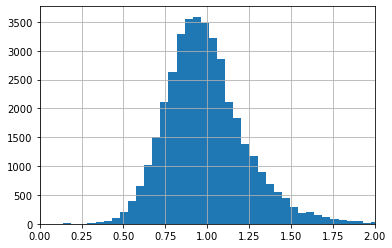

In [28]:
test_df['tipp_arany']=test_df['nmAr']/test_df['tipp']
plt.xlim(0,2)
test_df['tipp_arany'].hist(bins=300)

In [22]:
erdekesek=test_df[  (test_df['tipp_arany']>0.75 ) & (test_df['tipp_arany']<0.95)]

In [14]:
len(erdekesek)

12992

In [15]:
len(erdekesek) / len(test_df)

0.37723453017570663

In [31]:
kiertekelo_fuggveny(test_df,'tipp','nmAr')

RMSE 129588.61476891184
MAE: 79414.57732327675
MAPE: 0.20275683405616407
atnezendok aranya 0.33083778966131905


# Hirdetés feladásámal időpontja

In [33]:
df['datum']=pd.to_datetime(df['created_at'])

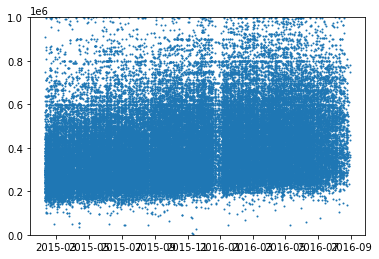

In [34]:
plt.ylim(0,1000000)
plt.scatter(df['datum'],df['nmAr'],s=1)

In [37]:
stat = df.groupby('datum',as_index=False).agg({"nmAr":"median"})

In [70]:
stat

,datum,trend_nmAr
0,2015-02-09,311324.872196
1,2015-02-10,311577.040554
2,2015-02-11,311829.208911
3,2015-02-12,312081.377269
4,2015-02-13,312333.545627
...,...,...
563,2016-08-25,453295.657623
564,2016-08-26,453547.825981
565,2016-08-27,453799.994338
566,2016-08-28,454052.162696


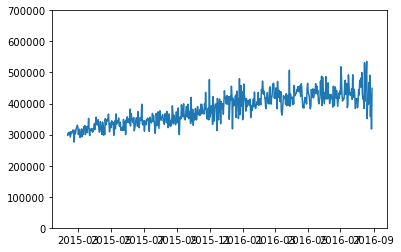

In [41]:
plt.ylim(0,700000)
plt.plot(stat['datum'],stat['nmAr'])

In [42]:
# gorbeillesztés, arany szamitas, utolo napra jelenertek szamitas

In [44]:
df['daynum'] = (df['datum']-df['datum'].min()).dt.days #567 napa

In [46]:
stat['daynum'] = (stat['datum']-stat['datum'].min()).dt.days #567 napa

In [47]:
minilinreg = LinearRegression()

In [48]:
minilinreg.fit(stat[ ['daynum'] ],stat['nmAr'])   # dataframe type

LinearRegression()

In [49]:
minilinreg.coef_

array([252.16835777])

In [50]:
minilinreg.intercept_

311324.872195904

In [51]:
stat['trend_nmAr'] = minilinreg.predict(stat[['daynum']])

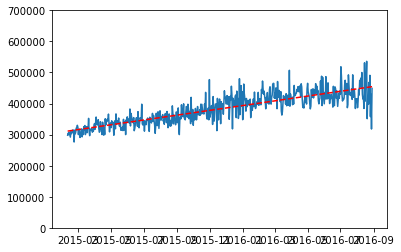

In [52]:
plt.ylim(0,700000)
plt.plot(stat['datum'],stat['nmAr'])
plt.plot(stat['datum'],stat['trend_nmAr'],'r--')

In [55]:
del stat['nmAr']
del stat['daynum']

In [56]:
df2 = df.merge(stat,on='datum',how='left')

In [58]:
df2['jelen_nmAr'] = df2['nmAr']/df2['trend_nmAr']*stat['trend_nmAr'].max()

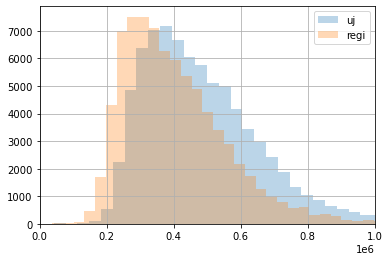

In [60]:
plt.xlim(0,1000000)
df2['jelen_nmAr'].hist(bins=300,label='uj',alpha=0.3)
df2['nmAr'].hist(bins=300,label='regi', alpha=0.3)
plt.legend()

In [61]:
train_df,test_df = train_test_split(df,test_size=0.5,random_state=42)
test_df=modellezes3(model_gbm,train_df,test_df,bemeno_valtozok,'nmAr')
kiertekelo_fuggveny(test_df,'tipp','nmAr')

RMSE 129588.61476891184
MAE: 79414.57732327675
MAPE: 0.20275683405616407
atnezendok aranya 0.33083778966131905


In [62]:
df = df2.copy()
train_df,test_df = train_test_split(df,test_size=0.5,random_state=42)
test_df=modellezes3(model_gbm,train_df,test_df,bemeno_valtozok,'jelen_nmAr')
kiertekelo_fuggveny(test_df,'tipp','jelen_nmAr')

RMSE 147148.67952068071
MAE: 87126.66082559526
MAPE: 0.18113966939706763
atnezendok aranya 0.35808505220269926


In [64]:
pd.set_option('display.max_columns',None)

In [65]:
df

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,nmAr,panel_flag,ker_code,kerulet_sorszam,heating_type=_central heating with own meter,heating_type=_district heating,heating_type=_electric,heating_type=_fan-coil,heating_type=_gas furnace,"heating_type=_gas furnace, circulating hot water",heating_type=_konvection gas burner,heating_type=_other,heating_type=_tile stove (gas),kerulet_12.0,kerulet_1.0,kerulet_16.0,kerulet_10.0,kerulet_18.0,kerulet_11.0,kerulet_3.0,kerulet_14.0,kerulet_9.0,kerulet_8.0,kerulet_20.0,kerulet_13.0,kerulet_15.0,kerulet_5.0,kerulet_6.0,kerulet_7.0,kerulet_19.0,kerulet_4.0,kerulet_17.0,kerulet_2.0,kerulet_21.0,kerulet_0.0,kerulet_23.0,kerulet_22.0,atlag_nmAr,datum,daynum,trend_nmAr,jelen_nmAr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,361538.461538,0,0,12.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511893.088631,2015-02-09,0,311324.872196,527579.077640
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,444444.444444,0,1,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,567816.221212,2015-02-09,0,311324.872196,648560.568257
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,366666.666667,0,16,16.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,346937.667022,2015-02-09,0,311324.872196,535062.468812
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,200000.000000,0,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,272061.026411,2015-02-09,0,311324.872196,291852.255716
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,other,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,170000.000000,1,18,18.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,284178.795429,2015-02-09,0,311324.872196,248074.417358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169,460000.000000,0,6,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,528447.458687,2016-08-29,567,454304.331054,460000.000000
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,NaN,other,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174,368571.428571,1,3,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,373274.537385,2016-08-29,567,454304.331054,368571.428571
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,NaN,konvection gas burner,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176,360000.000000,0,0,14.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,372609.965422,2016-08-29,567,454304.331054,360000.000000
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,NaN,"gas furnace, circulating hot water",none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179,437500.000000,0,2,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,533648.304630,2016-08-29,56

In [69]:
# tajolas
df['orientation'].value_counts().index

Index(['east', 'south-west', 'west', 'south-east', 'south', 'north-east',
       'north-west', 'north'],
      dtype='object')

In [ ]:
mm = {'east':90,'south-west','west':270, 'south-east':135, 'south':180, 'north-east':45,
       'north-west':315, 'north':0}

In [ ]:
df['orientation_degree']=df['orientation'].map(mm)

In [ ]:
df['orientation_degree']=df['orientation'].fillna(-1)

In [ ]:
bemeno_valtozok2 = bemeno_valtozok+['orientation_degree']

In [ ]:
df['ori_x'] = df['orientation_degree'].apply(lambda x: np.sin((2*np.pi)*x/365))

In [ ]:
df['ori_y'] = df['orientation_degree'].apply(lambda x: np.cos((2*np.pi)*x/365))

In [ ]:
df.loc

# keresztvalidáció

In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [ ]:
# korabban megirt MAPE fg.-t masoljuk
# hiba minel kisebb annal jobb, greater is better = False
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better = False)

In [ ]:
model = LinearRegression()

In [ ]:
# keresztvalidáció
scores = cross_validate(model, df[bemeno_valtozok], df[celvaltozo], cv = 3, scoring = mape_scorer)